In [ ]:
from google.colab import files

files.upload()


In [2]:
!pip install -q kaggle

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d cornflake15/denpasarbalihistoricalweatherdata

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/7.32M [00:00<?, ?B/s]
100% 7.32M/7.32M [00:00<00:00, 77.3MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/denpasarbalihistoricalweatherdata.zip', 'r')
zip_ref.extractall('/content/sets')
zip_ref.close()

In [56]:
import pandas as pd
# /content/sets/openweatherdata-denpasar-1990-2020.csv


df = pd.read_csv('/content/sets/openweatherdata-denpasar-1990-2020v0.1.csv')
df.head(10)

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
5,1/1/1990 5:00,28800,Denpasar,-8.652497,115.219117,27.23,27.23,27.23,1009.0,82,...,NaN,NaN,NaN,NaN,NaN,65,803,Clouds,broken clouds,04d
6,1/1/1990 6:00,28800,Denpasar,-8.652497,115.219117,27.32,27.32,27.32,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04d
7,1/1/1990 7:00,28800,Denpasar,-8.652497,115.219117,27.29,27.29,27.29,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,71,500,Rain,light rain,10d
8,1/1/1990 8:00,28800,Denpasar,-8.652497,115.219117,27.34,27.34,27.34,1007.0,81,...,NaN,NaN,NaN,NaN,NaN,76,500,Rain,light rain,10d
9,1/1/1990 9:00,28800,Denpasar,-8.652497,115.219117,27.23,27.23,27.23,1007.0,82,...,NaN,NaN,NaN,NaN,NaN,87,804,Clouds,overcast clouds,04d


In [57]:
total_data = df.shape

print('Total datasets adalah sebanyak', total_data)

Total datasets adalah sebanyak (264924, 29)


In [58]:
df.isnull().sum()

dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [59]:
df_new = df[["dt_iso","temp"]]
df_new

,dt_iso,temp
0,1/1/1990 0:00,25.82
1,1/1/1990 1:00,26.20
2,1/1/1990 2:00,26.45
3,1/1/1990 3:00,26.80
4,1/1/1990 4:00,27.04
...,...,...
264919,1/7/2020 19:00,27.00
264920,1/7/2020 20:00,27.00
264921,1/7/2020 21:00,28.00
264922,1/7/2020 22:00,28.00


In [60]:
df_new.columns =["data", 'temp']
df_new

,data,temp
0,1/1/1990 0:00,25.82
1,1/1/1990 1:00,26.20
2,1/1/1990 2:00,26.45
3,1/1/1990 3:00,26.80
4,1/1/1990 4:00,27.04
...,...,...
264919,1/7/2020 19:00,27.00
264920,1/7/2020 20:00,27.00
264921,1/7/2020 21:00,28.00
264922,1/7/2020 22:00,28.00


In [61]:
df_new["data"] = pd.to_datetime(df_new["data"])
df_new.head()

<ipython-input-61-90ec512ef0bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["data"] = pd.to_datetime(df_new["data"])


,data,temp
0,1990-01-01 00:00:00,25.82
1,1990-01-01 01:00:00,26.20
2,1990-01-01 02:00:00,26.45
3,1990-01-01 03:00:00,26.80
4,1990-01-01 04:00:00,27.04


In [62]:
data_world = df_new[['data','temp']].copy()
data_world['data'] = data_world['data'].dt.date

data_world.set_index('data', inplace= True)

data_world.head(10)

,temp
data,
1990-01-01,25.82
1990-01-01,26.20
1990-01-01,26.45
1990-01-01,26.80
1990-01-01,27.04
1990-01-01,27.23
1990-01-01,27.32
1990-01-01,27.29
1990-01-01,27.34


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_1 = scaler.fit_transform(data_world)

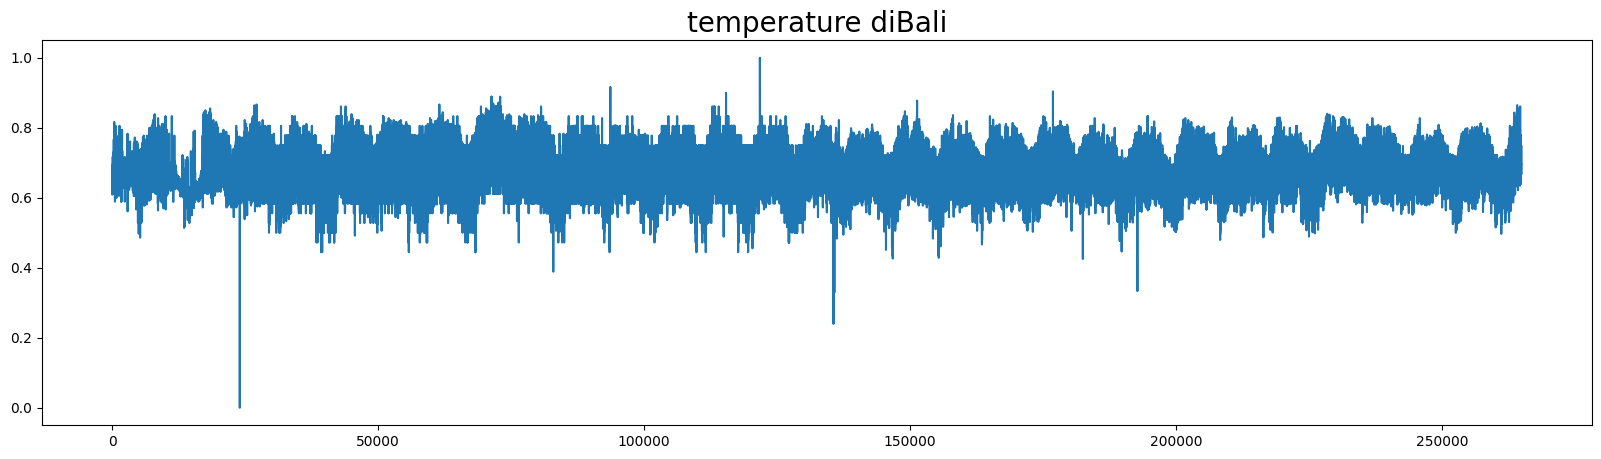

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(data_1)
plt.title('temperature diBali', fontsize=20)
plt.show()

In [65]:
train_size = int(len(data_1) * 0.8)

test_size = len(data_1) - train_size


X_data, y_data = data_1[0:train_size, :], data_1[train_size:len(data_1), :1]

print("Training set size:", train_size)
print("Testing set size:", test_size)

Training set size: 211939
Testing set size: 52985


In [66]:
import tensorflow as tf
import numpy as np
def dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [67]:
X_train, y_train = dataset(X_data, 100)
X_test, y_test = dataset(y_data, 100)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout


model = Sequential([
    LSTM(64, return_sequences = True, input_shape=(100, 1)),
    Dropout(0.1),
    LSTM(64, return_sequences = True),
    Dropout(0.1),
    Bidirectional(LSTM(64)),
    Dropout(0.1),
    Dense(8, activation = 'relu'),
    Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 64)           16896     
                                                                 
 dropout_3 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 64)           33024     
                                                                 
 dropout_4 (Dropout)         (None, 100, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [69]:
x = (data_1.max() - data_1.min()) * 10/100
print(x)

0.09999999999999998


In [70]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< 0.1 and logs.get('val_mae')< 0.1 ):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [71]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"]
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 10,
    batch_size = 1000,
    callbacks=[callbacks],
    verbose = 1
)

Epoch 1/10
212/212 [==============================] - 603s 3s/step - loss: 0.1017 - mae: 0.4267 - val_loss: 0.0289 - val_mae: 0.2353
Epoch 2/10
212/212 [==============================] - 592s 3s/step - loss: 0.0111 - mae: 0.1306 - val_loss: 0.0038 - val_mae: 0.0737
Epoch 3/10
212/212 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0538
MAE dari model < 10% skala data
212/212 [==============================] - 593s 3s/step - loss: 0.0024 - mae: 0.0538 - val_loss: 0.0015 - val_mae: 0.0443


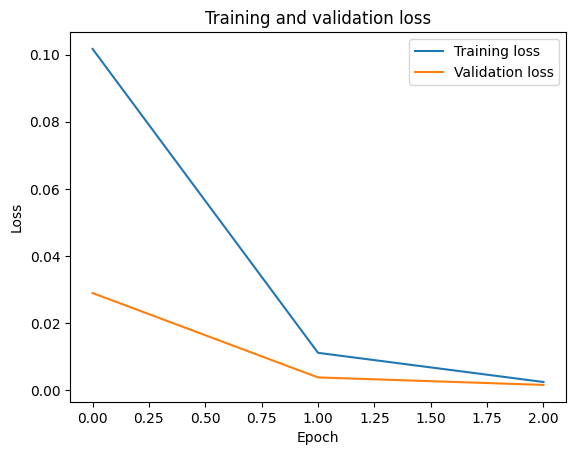

In [72]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

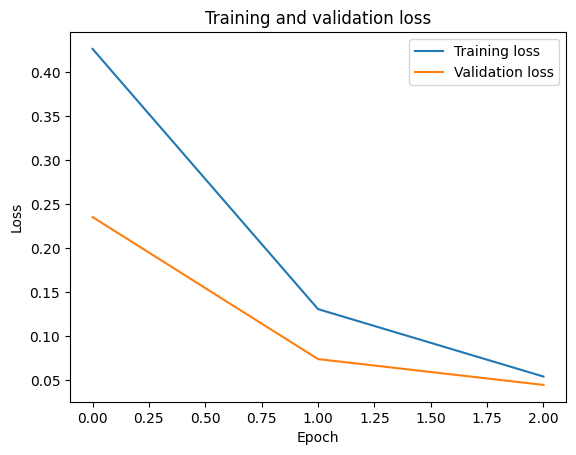

In [74]:
plt.plot(history.history['mae'], label='Training loss')
plt.plot(history.history['val_mae'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()